### BEST FIRST SEARCH


In [ ]:
import networkx as nx
import queue
import matplotlib.pyplot as plt


Path: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]


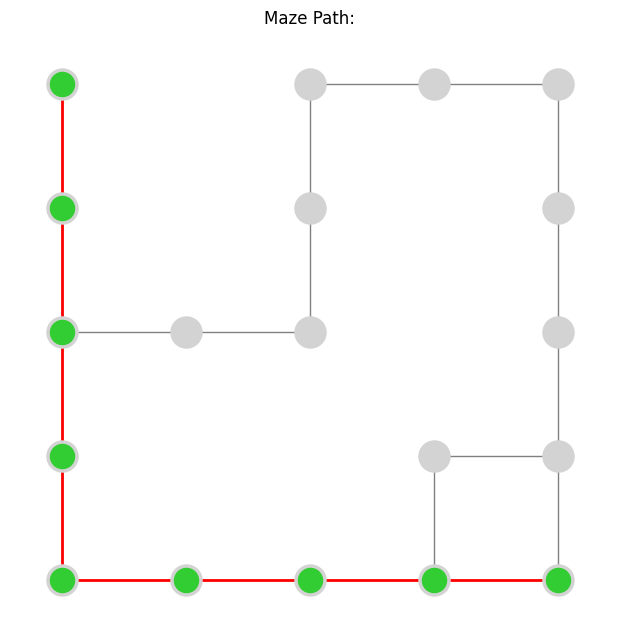

In [19]:
# Manhattan distance to find the hueristic values
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])


def best_first_search(maze, start, goal):
    visited = set() #an empty set to store the nodes that we visited to keep track of the path and nodes
    pri_queue = queue.PriorityQueue() #priority queue
    pri_queue.put((heuristic(start, goal), [start])) #we will push the start and goal to the queue and it will guess the path to our goal and store it in a list

    while not pri_queue.empty():    #this loop will run until there is no path to go in the queue
        _, path = pri_queue.get() #_ is the priority because we dont care whatever direction it takes
        current = path[-1] #current will be the last step we took from the path list until we discover our next move

        if current == goal: #if we reached our goal then we will return the path
            return path

        if current in visited: #if we have already visited a node then we will skip it and search for the neighbor nodes of the current
            continue
        
        visited.add(current) #if the node is unvisited we will add it to the visited set

        for dr, dc in [(-1,0), (1,0), (0,-1), (0,1)]: #directions (up , down , left and right respectively)
            nr, nc = current[0] + dr, current[1] + dc #this will try the next node that we will go to new row and new column
            next_node = (nr, nc) #proceeding to the next node


            if 0 <= nr < len(maze) and 0 <= nc < len(maze[0]): #making sure we dont go outside the maze
                if maze[nr][nc] == 0 and next_node not in visited: #if the path ahead has no obstacle and the node is unvisited 
                    pri_queue.put((heuristic(next_node, goal), path + [next_node])) #then we will add it to the queue and repeat the whole process again
    
    return None #if we obsereve all the nodes and there is no path to reach our goal then we will simply return no path


def show_maze(maze, path):
    G = nx.Graph()
    rows, cols = len(maze), len(maze[0])

    for r in range(rows):
        for c in range(cols):
            if maze[r][c] == 0:
                for dr, dc in [(-1,0), (1,0), (0,-1), (0,1)]:
                    nr, nc = r + dr, c + dc
                    if 0 <= nr < rows and 0 <= nc < cols and maze[nr][nc] == 0:
                        G.add_edge((r, c), (nr, nc))

    pos = { (r, c): (c, -r) for r in range(rows) for c in range(cols) if maze[r][c] == 0 }

    plt.figure(figsize=(6, 6))
    nx.draw(G, pos, node_color='lightgray', edge_color='gray', with_labels=False, node_size=500)

    if path:
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='limegreen')
        nx.draw_networkx_edges(G, pos, edgelist=list(zip(path[:-1], path[1:])), edge_color='red', width=2)

    plt.title("Maze Path:")
    plt.axis('off')
    plt.show()


maze = [
    [0,1,0,0,0],
    [0,1,0,1,0],
    [0,0,0,1,0],
    [0,1,1,0,0],
    [0,0,0,0,0]
]

start = (0, 0)
goal = (4, 4)

path = best_first_search(maze, start, goal)

print("\nPath:", path)
show_maze(maze, path)
